In [1]:
#
import pandas as pd
import re
import demoji
import string

import nltk
from textblob import TextBlob

import seaborn as sb

In [2]:
df = pd.read_csv('araskargo.csv')
df.sample(5)

Unnamed: 0                       Date         User  \
7490        7490  2020-05-14 12:43:03+00:00   suatkurtlu   
4795        4795  2020-12-22 06:52:44+00:00    nurgl_107   
1696        1696  2021-10-20 19:36:14+00:00     YSNKLNDR   
1400        1400  2021-12-22 17:43:18+00:00   Elifcekaya   
6729        6729  2020-06-22 06:54:28+00:00  gbalogluu28   

                                                  Tweet  
7490  #araskargo 8 gün oldu artık kargomuzu getir he...  
4795  Yine bir @araskargo rezilliği. Dağıtıma çıktığ...  
1696  Çok merak ederek soruyorum sayın #araskargo ye...  
1400  Canım Aras Kargo kargomu çabuk getir emi rica ...  
6729  Aylar sonra #araskargo kargomu eve getirdi şua...

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nazir
[nltk_data]     Sharifi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop_words = set(stopwords.words('turkish'))
print(stop_words)

{'ya', 'hep', 'ne', 'veya', 'yani', 'hiç', 'kez', 'çünkü', 'her', 'bazı', 'için', 'ile', 'defa', 'gibi', 'niye', 'belki', 'nerede', 'eğer', 'niçin', 'şey', 'hepsi', 'nerde', 'çok', 'o', 'hem', 'kim', 'biz', 'ki', 'bu', 'az', 'mı', 'biri', 've', 'da', 'aslında', 'en', 'siz', 'daha', 'ise', 'nereye', 'nasıl', 'acaba', 'mu', 'birkaç', 'tüm', 'birşey', 'diye', 'mü', 'neden', 'ama', 'sanki', 'de', 'şu'}


In [5]:
def cleanTweet(tweet):
    tweet = tweet.lower()
    tweet = demoji.replace(tweet,"")
    tweet = re.sub('\n',' ',tweet)
    tweet = re.sub(r'@\w+|\#','',tweet)
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r"http\s+|www\S+|https\S+","",tweet,flags=re.MULTILINE) # remove link 
    filtered_words = [word for word in TextBlob(tweet).words if word not in stop_words]
    return " ".join(filtered_words)

********************************* Word Distribution before cleaning tweets ********************************

In [6]:
df['wordcount_bc']=df['Tweet'].map(lambda x:len(x.split()))

In [7]:
df.head()

Unnamed: 0                       Date           User  \
0           0  2022-09-30 21:56:39+00:00     GzmDuman58   
1           1  2022-09-30 19:46:59+00:00   Eminediyelim   
2           2  2022-09-30 08:09:31+00:00     PelinZeyno   
3           3  2022-09-29 21:47:23+00:00  Fehmi60461853   
4           4  2022-09-29 21:47:03+00:00  Fehmi60461853   

                                               Tweet  wordcount_bc  
0  Kargo şirketlerinde başkasının kargosunu alma ...            31  
1  @AtillaOzmumcu @TahsinLtan @vitaminlercom @ara...            21  
2  @araskargo Aldığınız malı çöpe atmak istiyorsa...            17  
3  taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...            35  
4  taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...            35

<AxesSubplot: xlabel='wordcount_bc', ylabel='Count'>

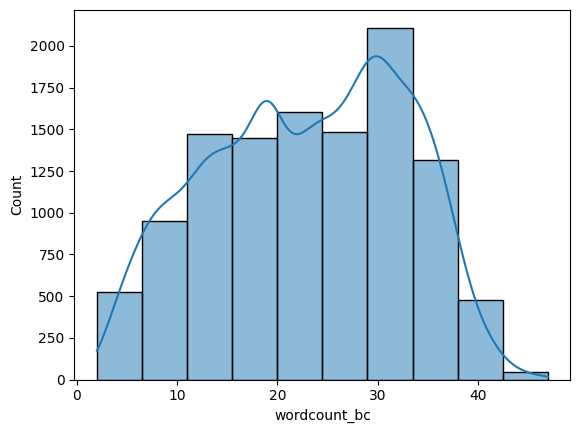

In [8]:
sb.histplot(data=df['wordcount_bc'],bins=10,kde=True)

In [9]:
df['cleanTweet'] = df['Tweet'].map(cleanTweet)
df.sample(5)

Unnamed: 0                       Date           User  \
7545         7545  2020-05-12 19:55:08+00:00   LilithinPink   
9117         9117  2019-10-07 13:41:23+00:00  kaktuslendikk   
3834         3834  2021-02-23 20:58:22+00:00  Fehmi60461853   
8495         8495  2020-01-30 14:48:02+00:00     ergunakalp   
11061       11061  2017-07-20 13:47:22+00:00    bucak_didar   

                                                   Tweet  wordcount_bc  \
7545   BU KARGOYU ARAYIP GÖRÜŞEBİLEN VAR MI ARKADAŞLA...             8   
9117   #araskargo bir daha sizden ne kargo alırım ne ...            10   
3834   @ArasKargoDESTEK sorumsuz #araskargo suçlu old...            27   
8495   Son zamanlarda kargo şirketleri saçma sapan iş...            28   
11061  İngiltereden bana gelen bisikletimin verdiğim ...            17   

                                              cleanTweet  
7545   kargoyu arayip görüşebi̇len var mi arkadaşlar ...  
9117   araskargo bir sizden kargo alırım kargo gönder...  
3834   sorumsuz araskargo suçlu olduğu beni engelledi...  
8495   son zamanlarda kargo şirketleri saçma sapan iş...  
11061  i̇ngiltereden bana gelen bisikletimin verdiğim...

********************************** Word Distribution after cleaning the tweets *************************************

In [10]:
df['wordcount_ac']=df['cleanTweet'].map(lambda x:len(x.split()))

<AxesSubplot: xlabel='wordcount_ac', ylabel='Count'>

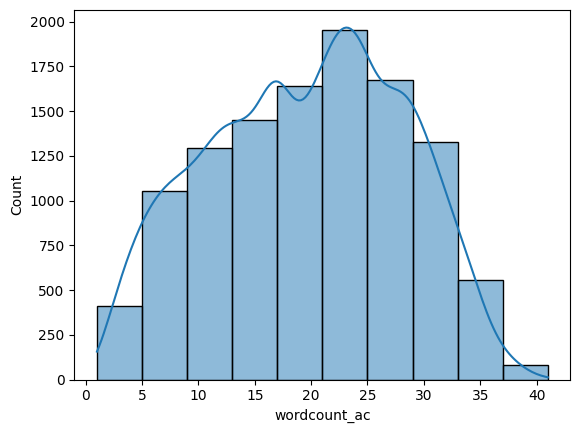

In [11]:
sb.histplot(data=df['wordcount_ac'],bins=10,kde=True)

************************* implementing model ****************************

In [12]:
docs = df['cleanTweet'].to_list()

In [13]:
docs[0]

'kargo şirketlerinde başkasının kargosunu alma olayları patladı bana sorarsanız mecbur kalmadıkça kargo değerli eşya göndermeyin söylemiyorlar bana sorarsanız kargo sistemleri hacklendi yurticikargo araskargo mngkargo ogretmenlersahada matura2023'

In [14]:
from top2vec import Top2Vec

In [15]:
model = Top2Vec(docs)

2023-01-05 12:06:30,332 - top2vec - INFO - Pre-processing documents for training
2023-01-05 12:06:31,980 - top2vec - INFO - Creating joint document/word embedding
2023-01-05 12:07:00,329 - top2vec - INFO - Creating lower dimension embedding of documents
2023-01-05 12:07:47,170 - top2vec - INFO - Finding dense areas of documents
2023-01-05 12:07:48,073 - top2vec - INFO - Finding topics


In [16]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [17]:
print(topic_sizes)

[440 371 364 364 346 342 341 319 307 307 295 256 244 224 207 207 205 201
 198 191 184 183 172 168 165 164 159 155 155 153 150 149 141 133 133 126
 125 125 122 116 110 109 108 108 106 105 102  99  99  98  95  95  95  95
  94  90  89  85  84  81  80  79  72  70  69  67  65  57  54  53  48  44
  23]


In [18]:
print(topic_nums)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


In [19]:
topic_words, word_scores, topic_nums = model.get_topics(10)

In [20]:
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
    print(nums)
    print(f'Words: {words}')

0
Words: ['uyandır' 'anlamazsın' 'uyan' 'yasamadan' 'kıran' 'demektir' 'pismanlık'
 'haberin' 'uyarmıstı' 'vermeyen' 'rezalet' 'dersin' 'paylas' 'yalan'
 'ceviren' 'abi' 'fehmi' 'emaneti' 'gelir' 'sen' 'hesabını' 'zarar'
 'tasıdıgı' 'sorumsuz' 'uzak' 'dan' 'durun' 'yuzunden' 'engellemis' 'mng'
 'mesele' 'zahmet' 'kırdıklarının' 'bedeli' 'emanet' 'fiso' 'edilen'
 'istemiyor' 'fasa' 'kargoyu' 'hedef' 'vermedi' 'yanmasin' 'ode' 'olsun'
 'ugradıgım' 'engeller' 'vermez' 'bul' 'haberi']
1
Words: ['oldugum' 'ulasmak' 'etmedi' 'baskasına' 'urunumu' 'be' 'nolu' 'haber'
 'mesajı' 'giden' 'hızlı' 'kisi' 'arkadaslar' 'nun' 'devam' 'no' 'subede'
 'tarihinde' 'gereken' 'ustelik' 'tarafından' 'saka' 'diyorsunuz'
 'ulasılamıyor' 'hepsiburada' 'bork' 'evime' 'acil' 'sms' 'telefona'
 'onemtasır' 'not' 'cozum' 'oldugu' 'kargoya' 'pismanlıktır' 'merkez'
 'yere' 'tek' 'surekli' 'ilgili' 'tesekkurler' 'adresime' 'kendi' 'verip'
 'umarım' 'uzerinden' 'kapıda' 'telefonu' 'subeyi']
2
Words: ['baskasına' 'vermi

In [21]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=10)
for doc, doc_score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {doc_score}")
    print('------------------')
    print(doc)
    print('------------------')
    print()

Document: 281, Score: 0.989605724811554
------------------
taşıdığı emaneti kıran hesabını vermeyen sorumsuz dan uzak durun uyan uyandır sorumsuz araskargo rezalet yalan pişmanlık zarar demektir yaşamadan anlamazsın osymbaskanlığı
------------------

Document: 355, Score: 0.9882121682167053
------------------
gelsinhayat taşıma parası ödenmiş emaneti kıran hesabını vermeyen dan uzak durun uyan paylaş uyandır araskargo rezalet yalan pişmanlık zarar demektir yaşamadan anlamazsın
------------------

Document: 212, Score: 0.9877732992172241
------------------
taşıdığı emaneti kıran hesabını vermeyen sorumsuz dan uzak durun uyan uyandır sorumsuz araskargo rezalet yalan pişmanlık zarar demektir yaşamadan anlamazsın kontenjanlarartsın
------------------

Document: 404, Score: 0.9875079989433289
------------------
taşıdığı emaneti kıran hesabını vermeyen dan uzak durun farkına var paylaş sen uyandır araskargo rezalet yalan pişmanlık zarar demektir yaşamadan anlamazsın sözünütutalikoç
---------

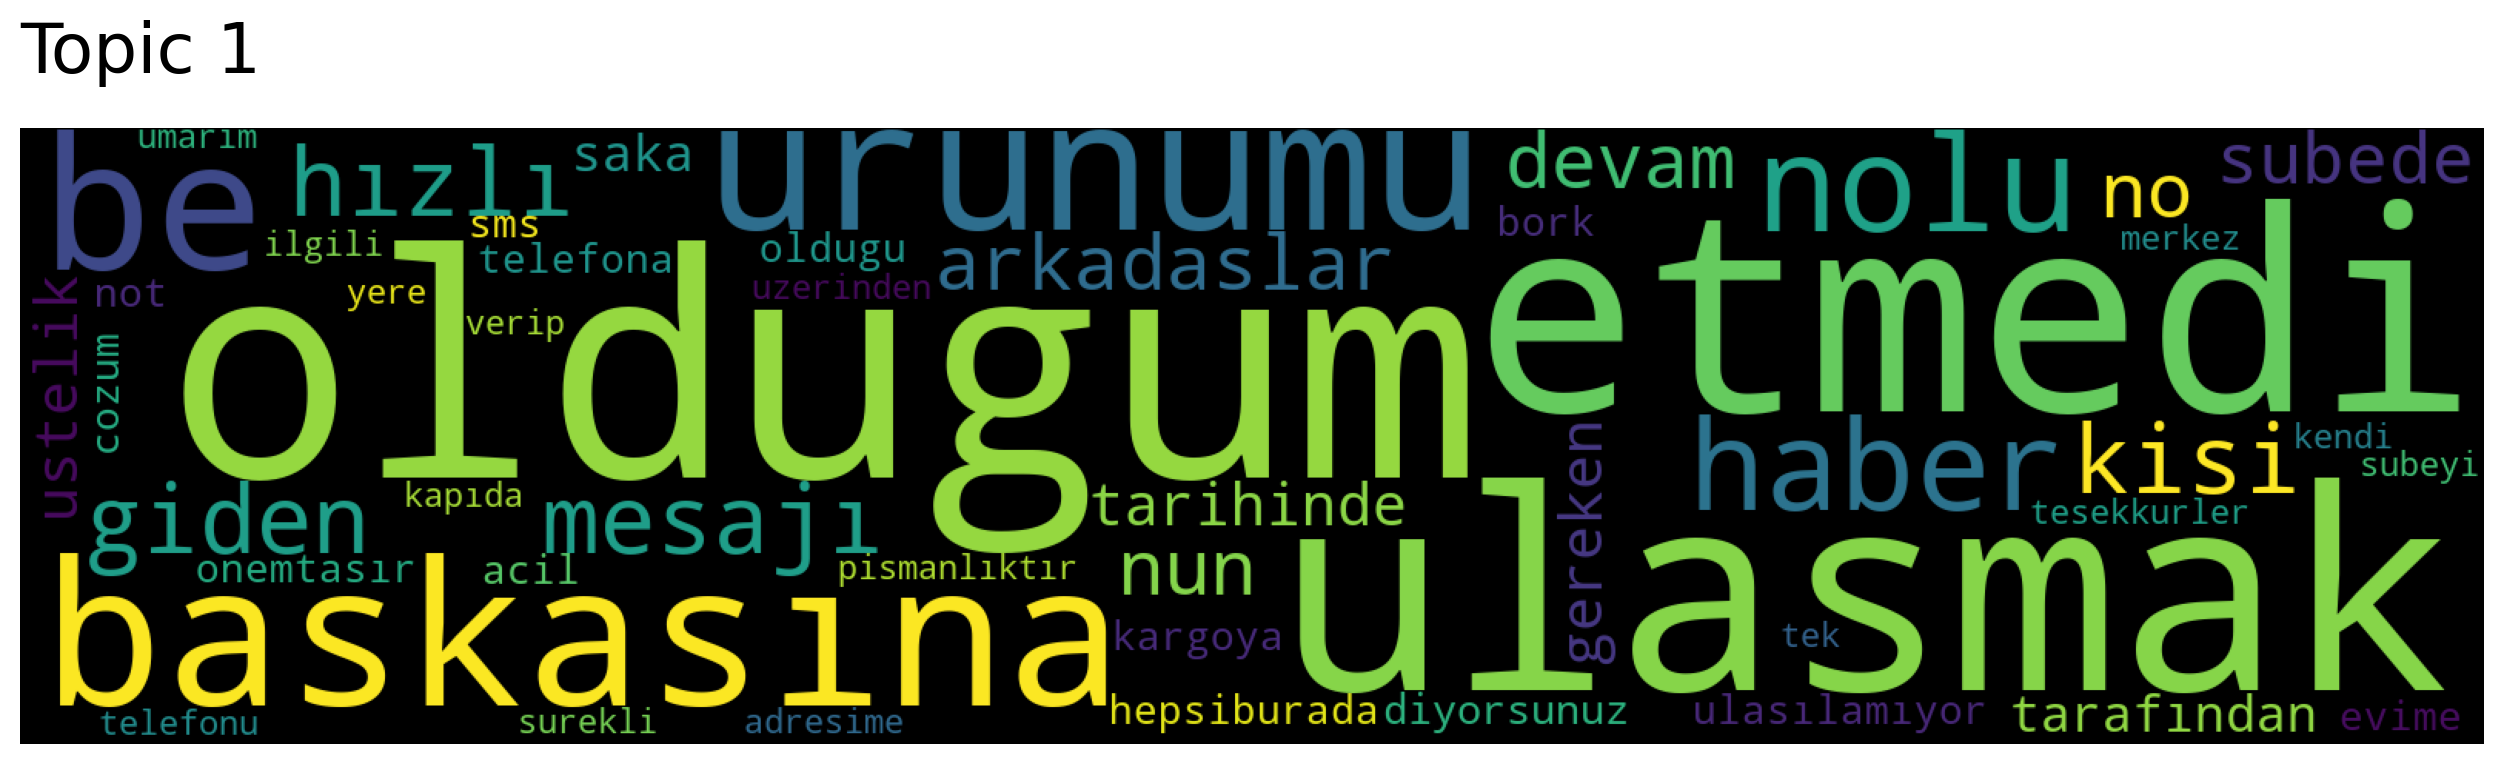

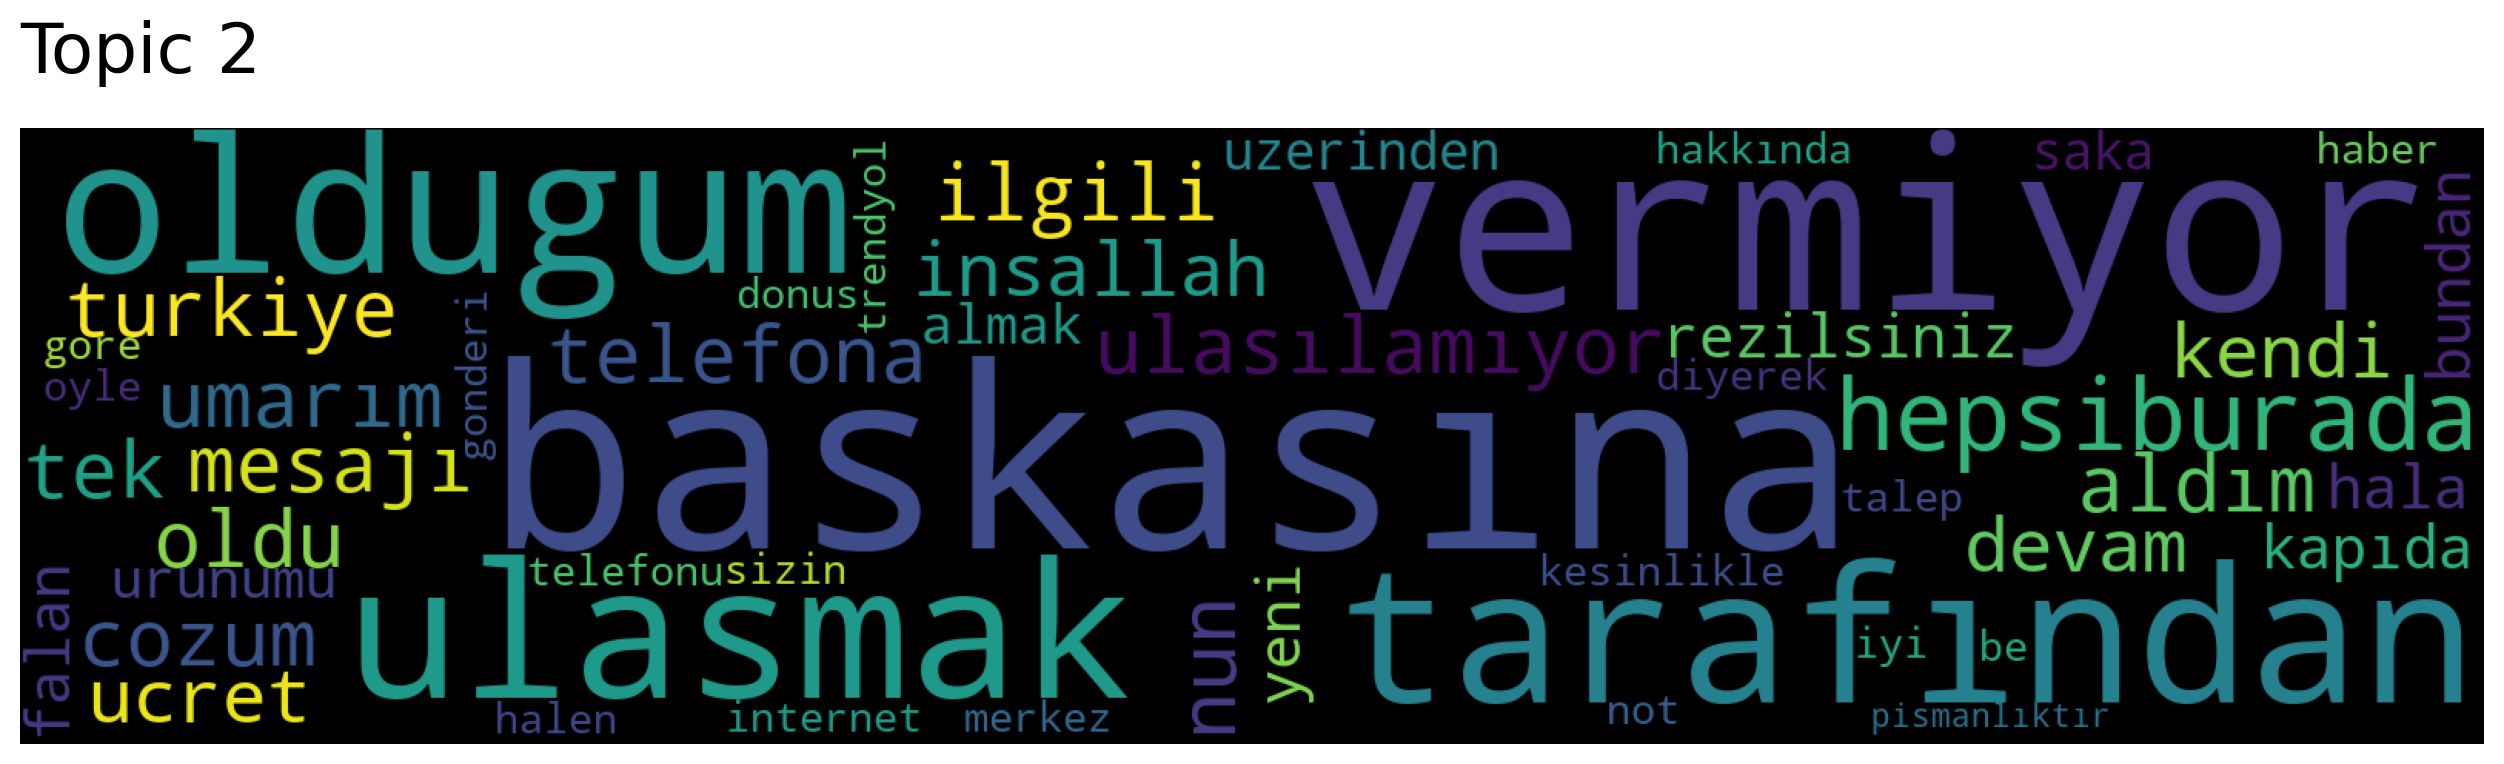

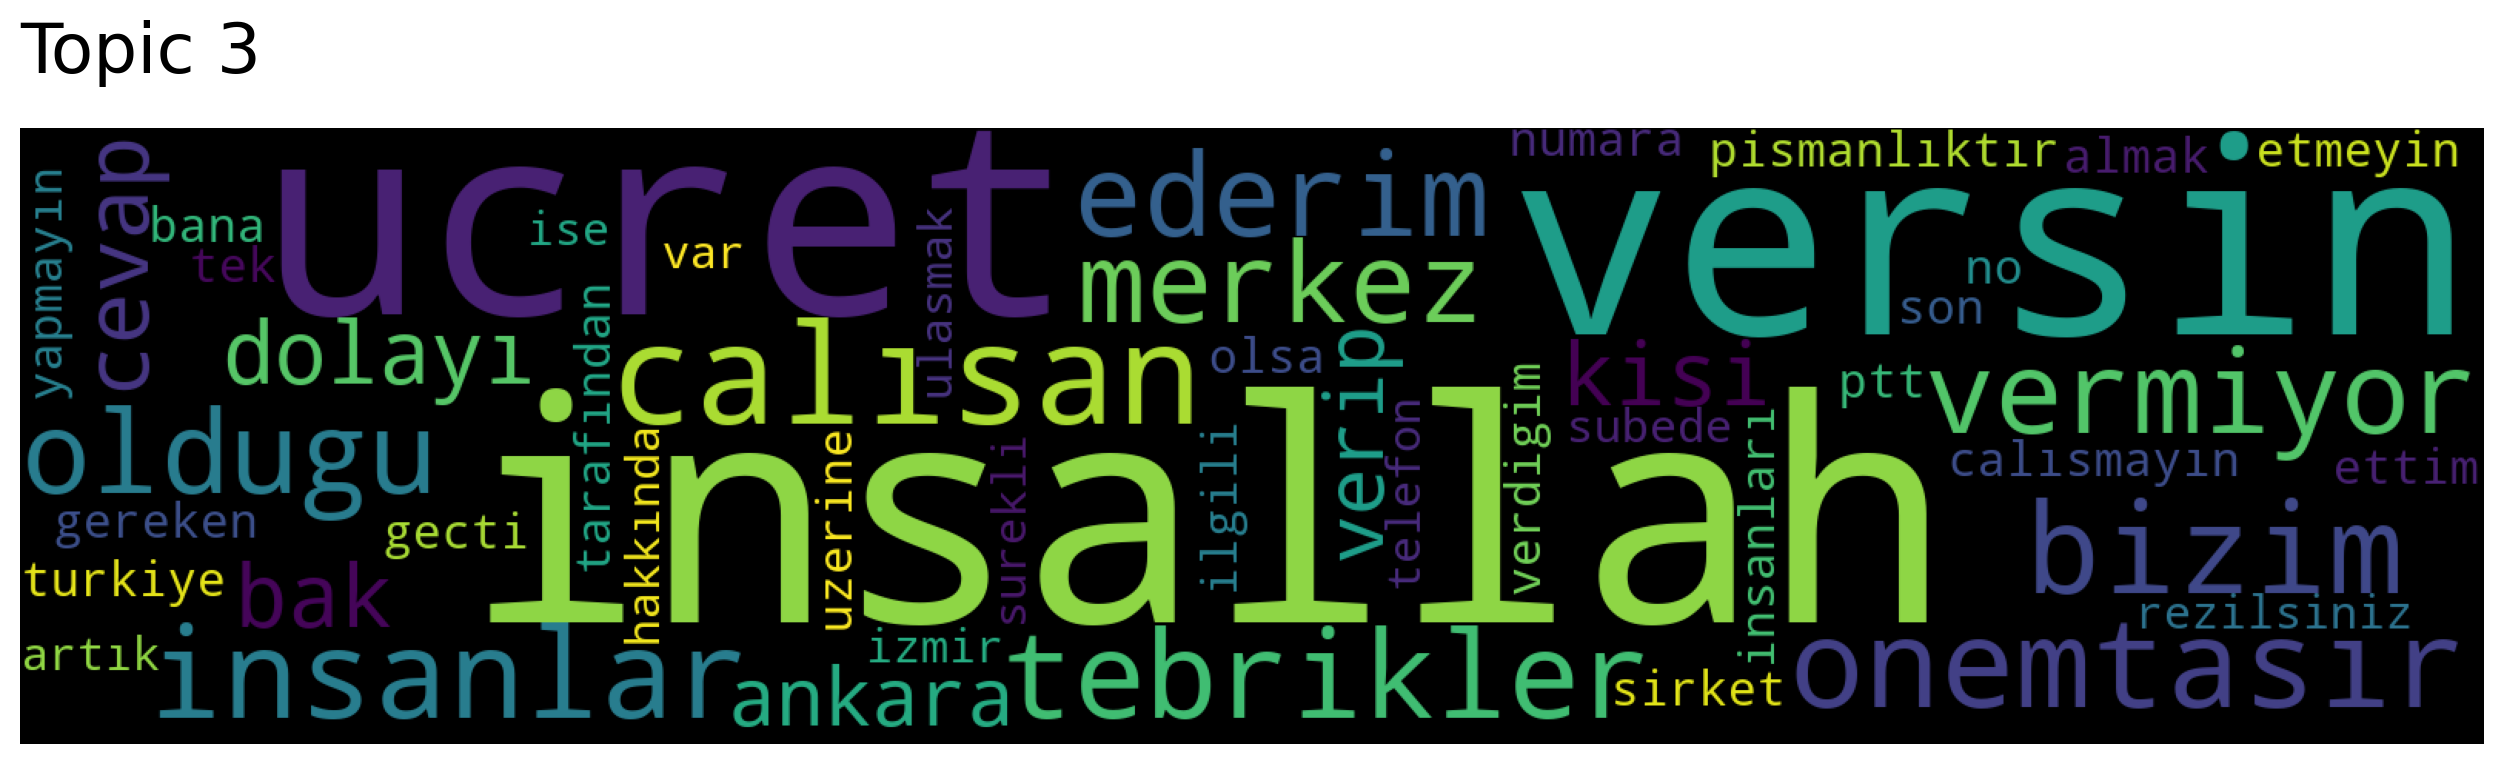

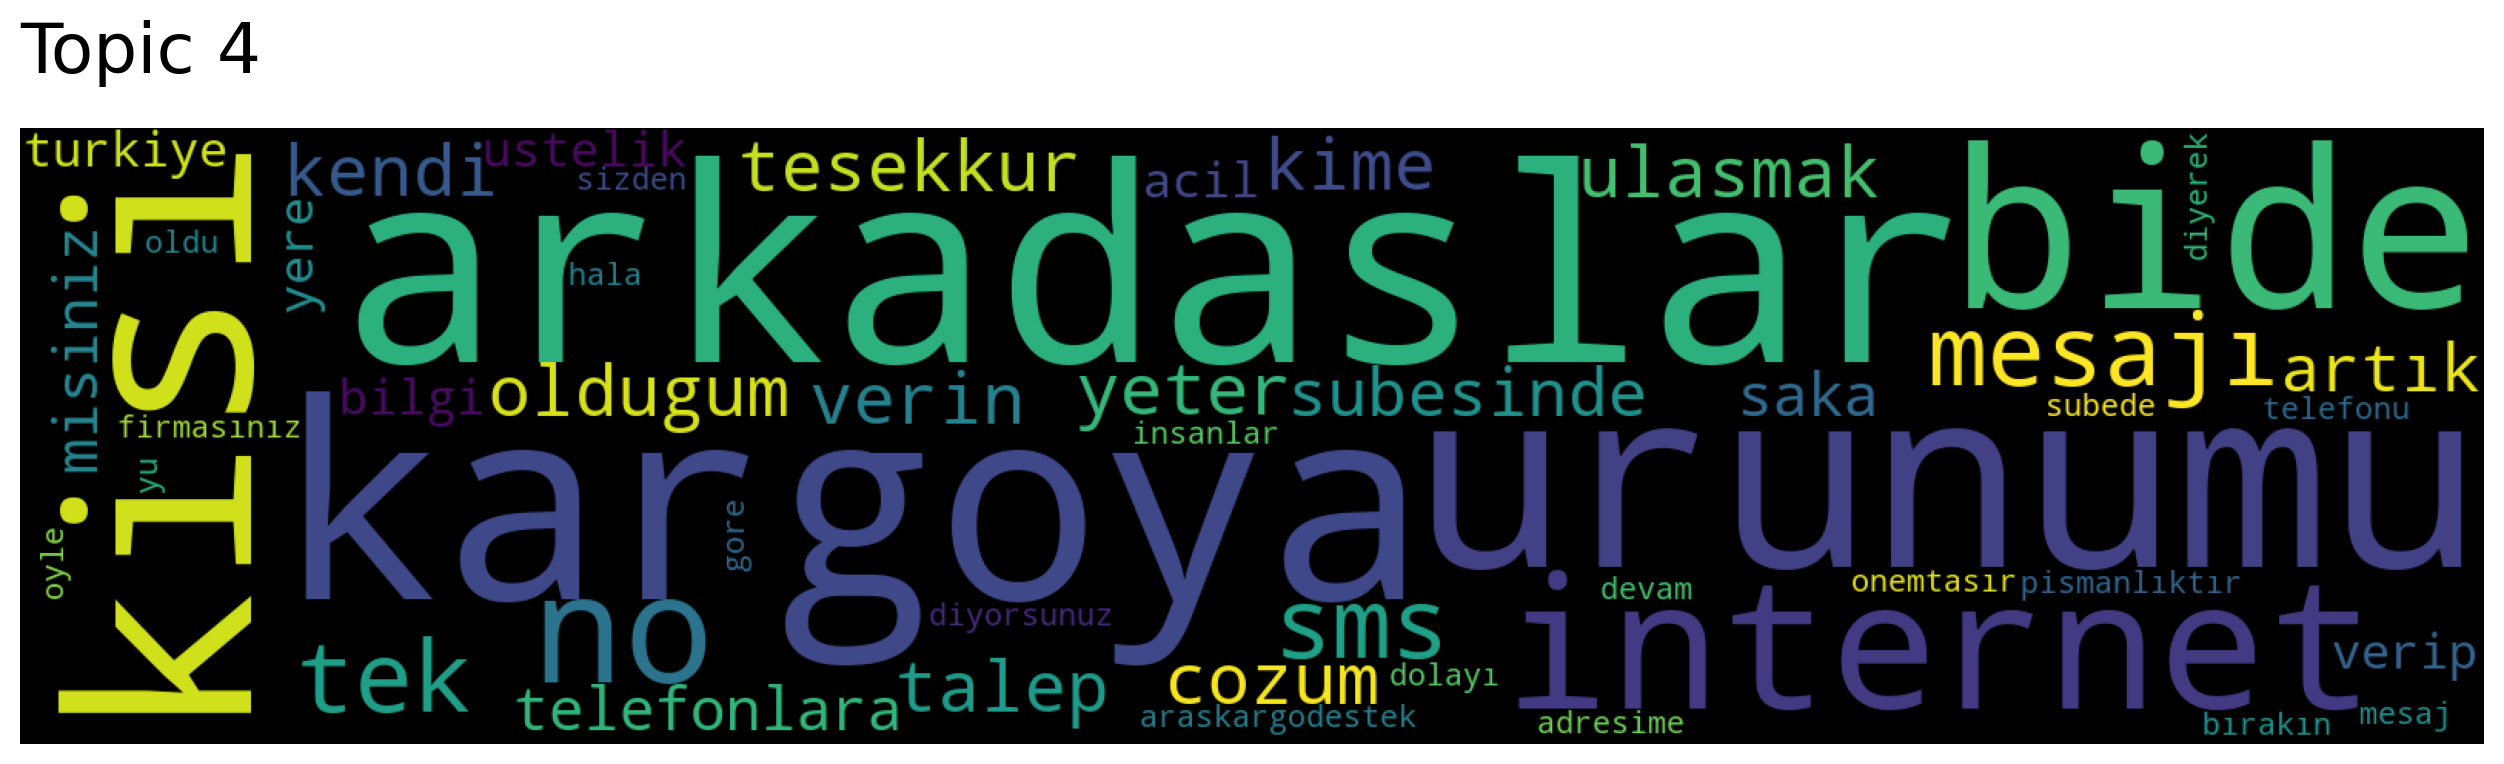

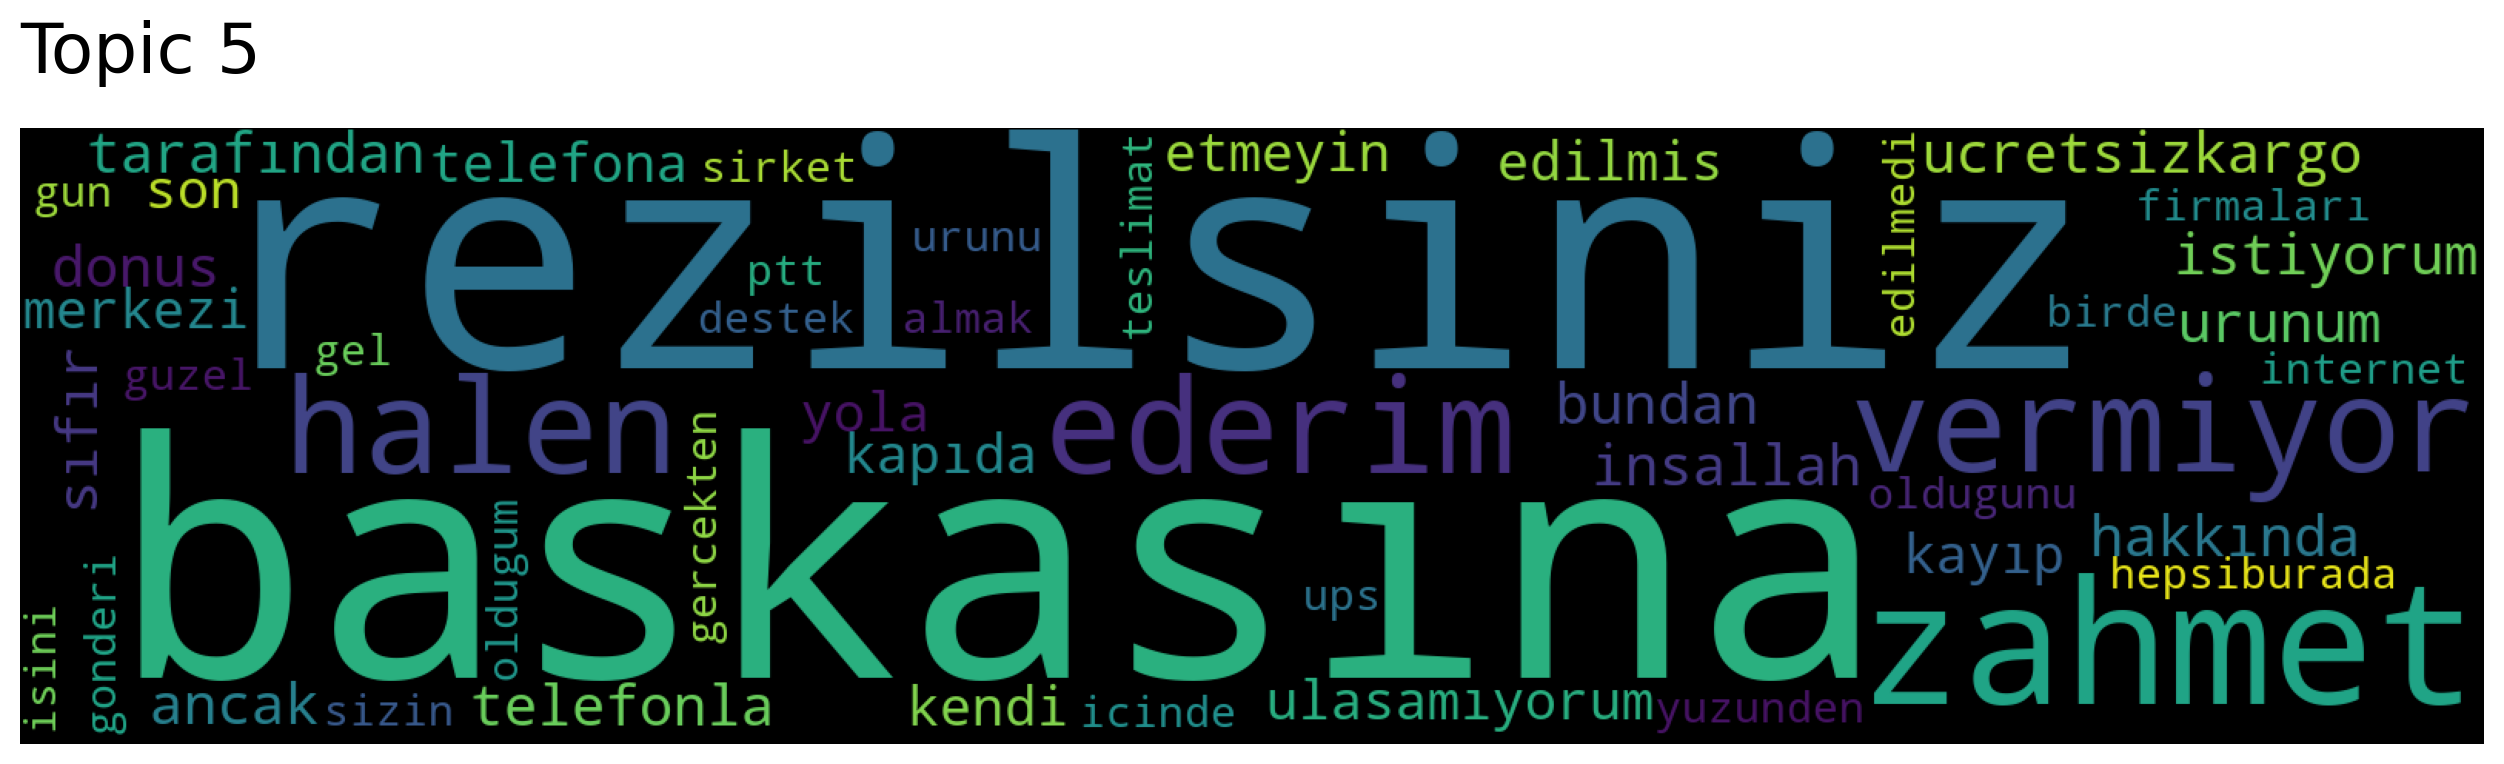

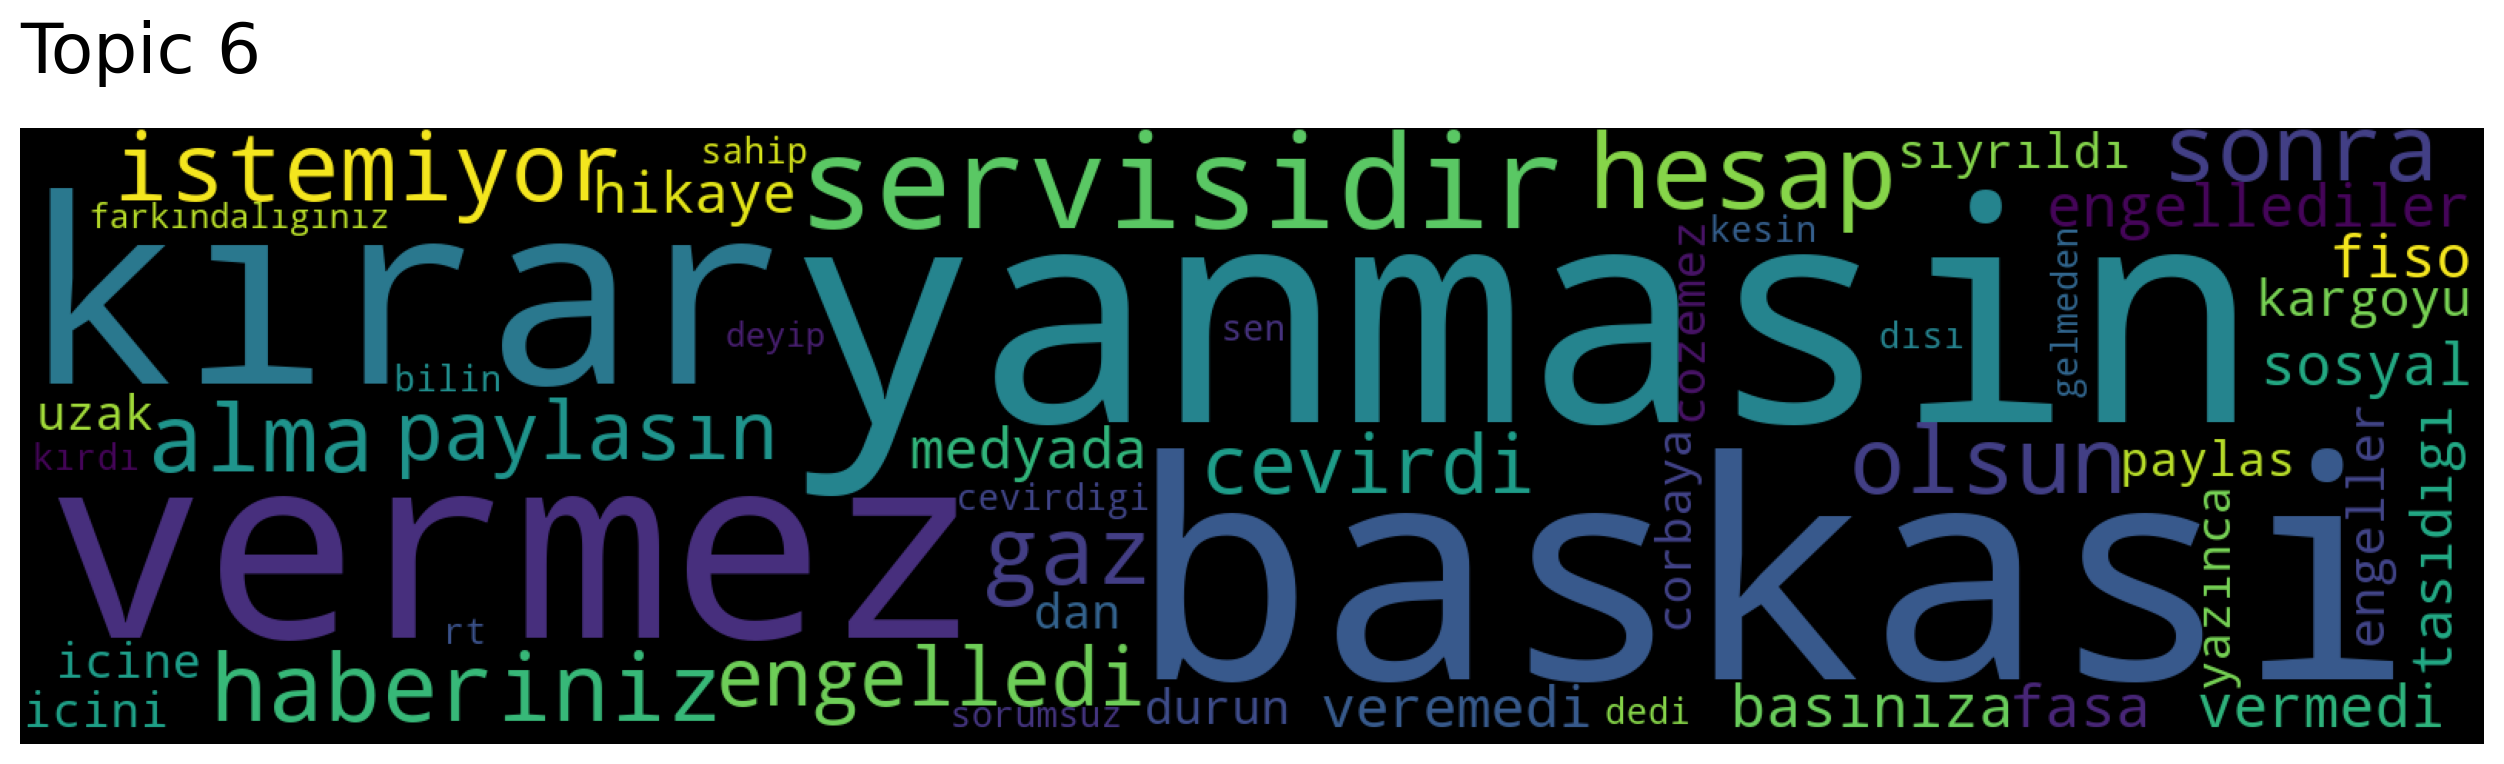

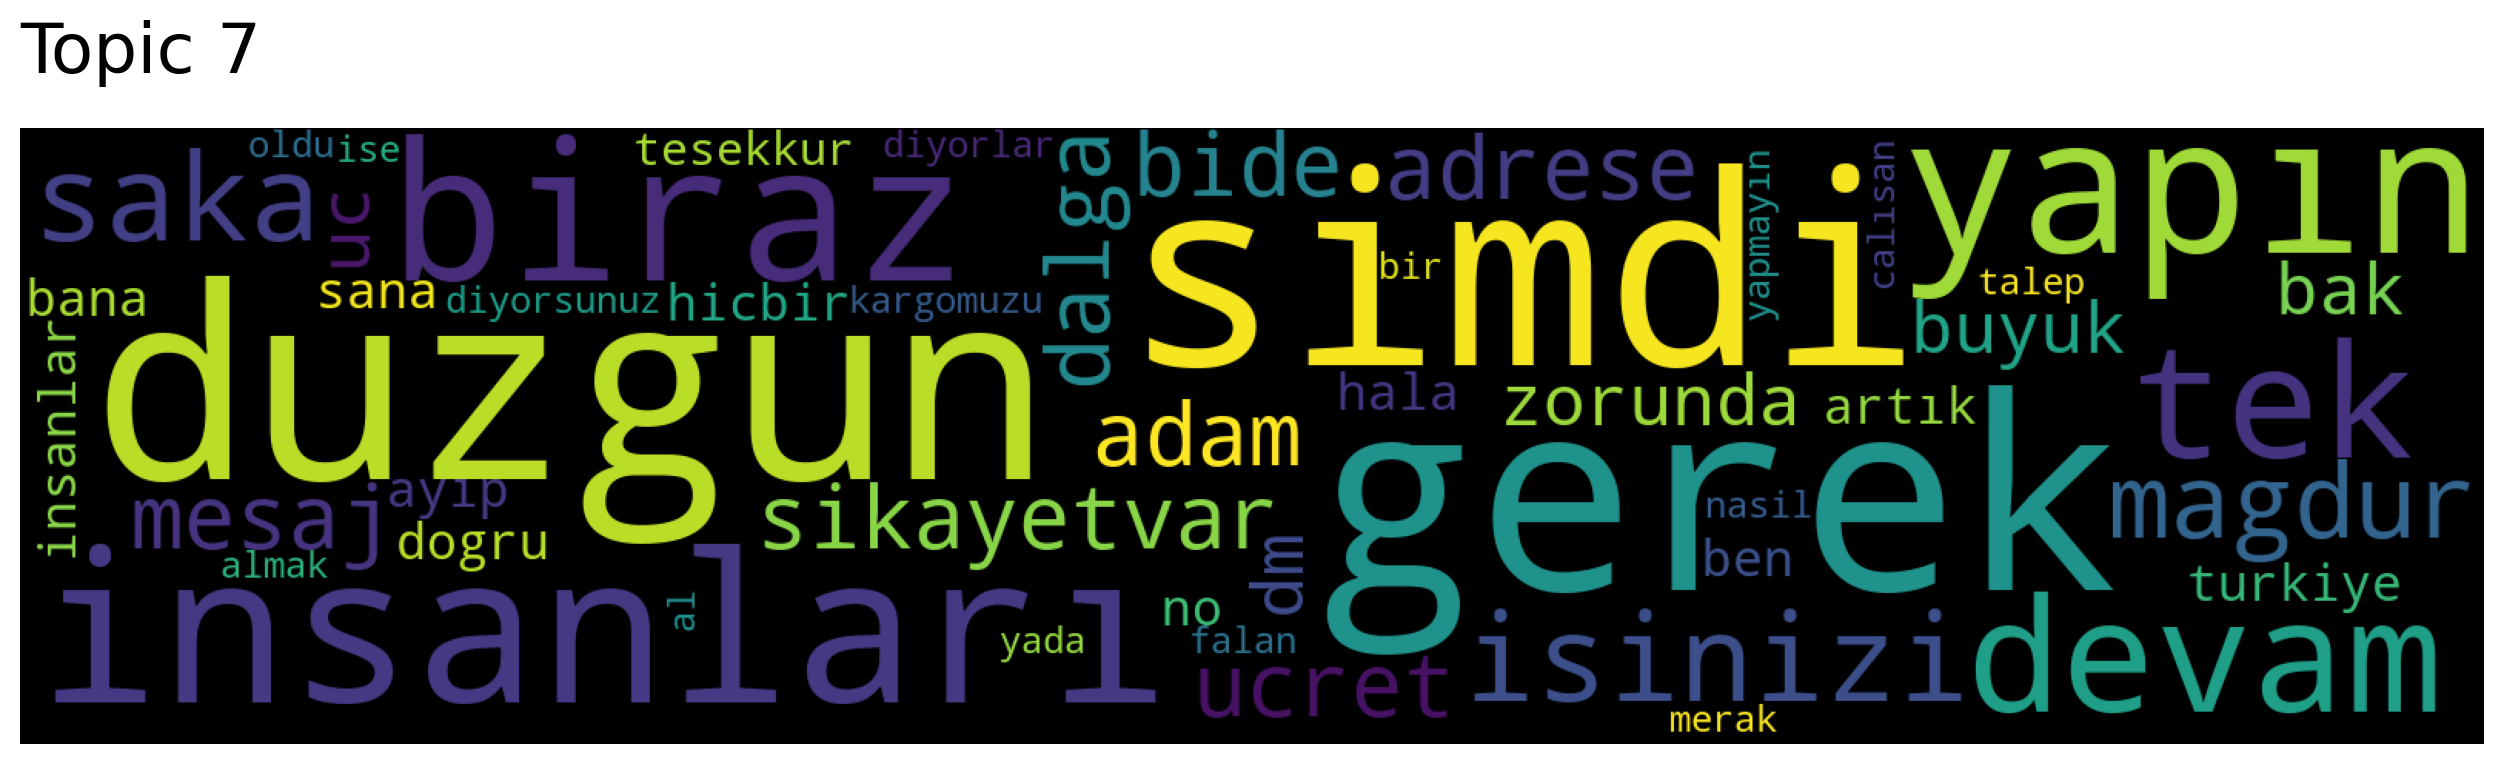

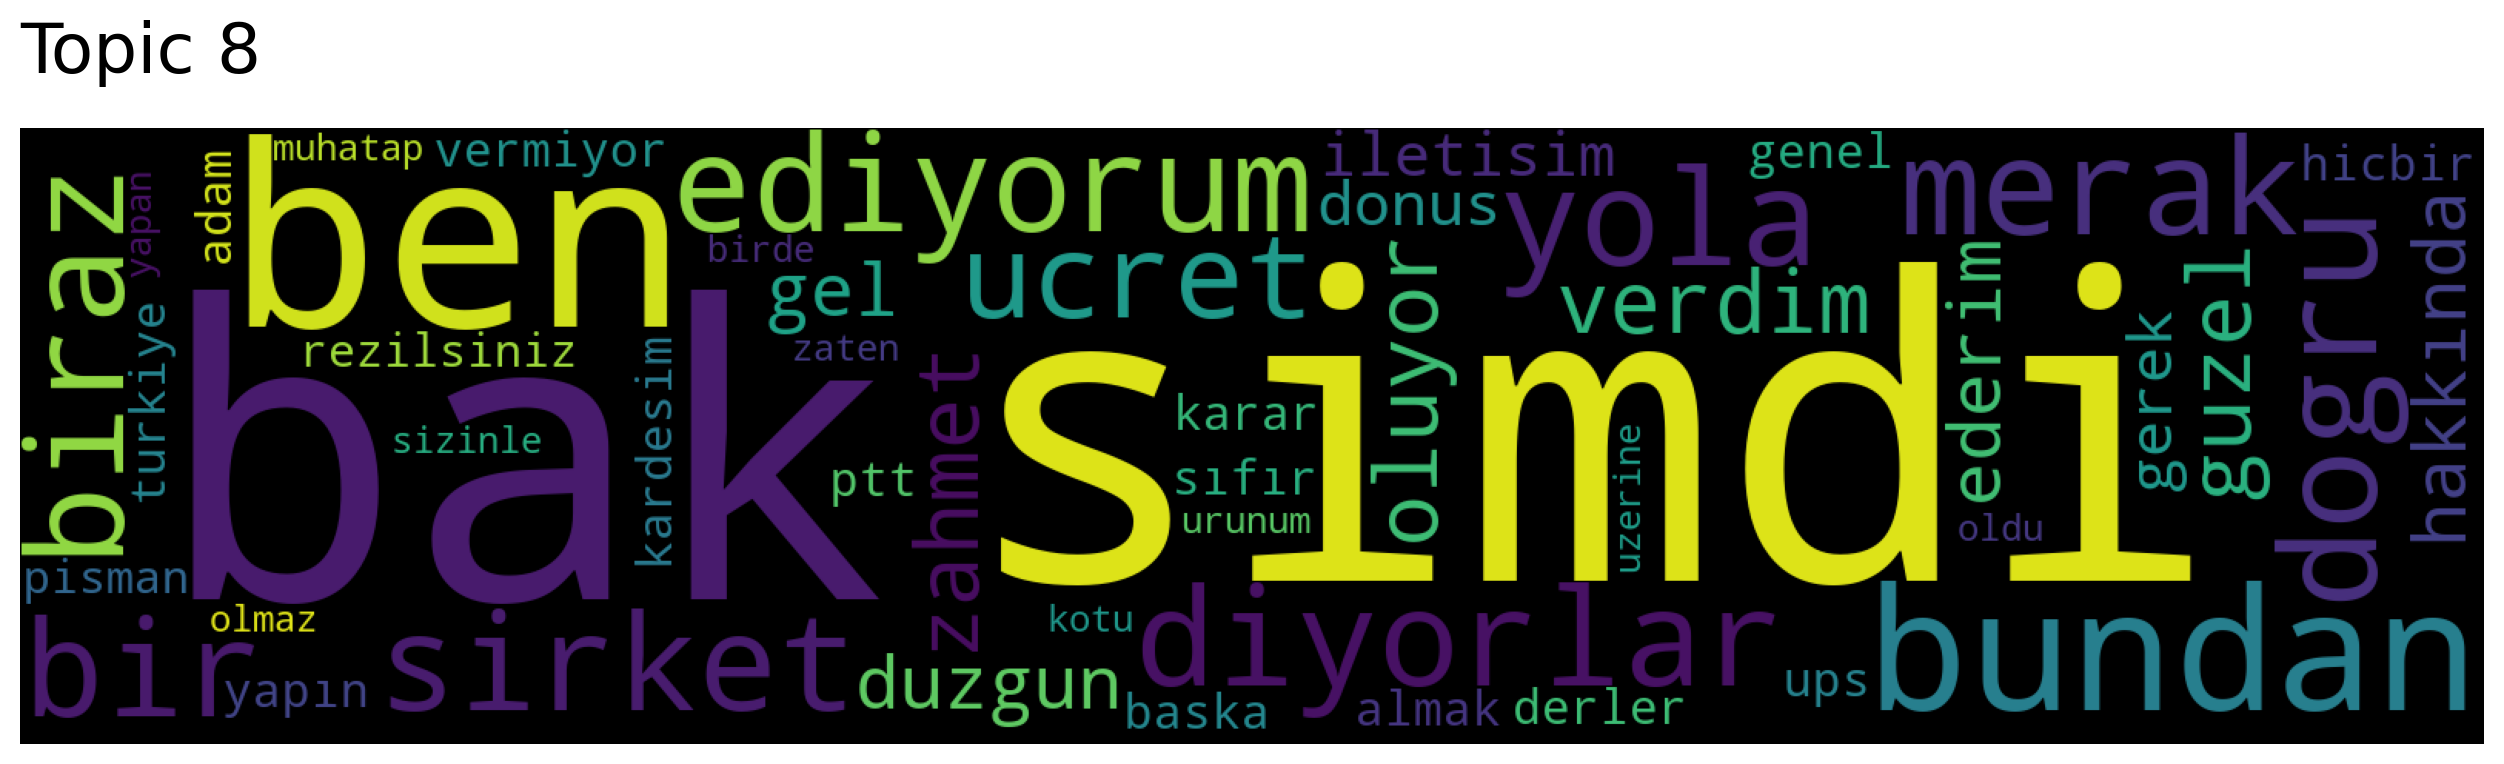

In [27]:
for topic in topic_nums[1:9]:
    model.generate_topic_wordcloud(topic, background_color="black")